In [1]:
import nest_asyncio
nest_asyncio.apply()

import yfinance as yf
from twitter_scraper import trends_symbols
from datascience import *
from urllib.request import urlopen
from datetime import datetime, timedelta
import numpy as np
%matplotlib inline

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


# Simulación de acciónes en la bolsa
### Gabriel Vallejo A01631816
### Gabriel Vallejo A01630738
### Gabriel Vallejo
### Gabriel Vallejo


In [2]:
def getStockData(stockName,start_date = '2021-01-01',end_date='2021-07-12'):
    #print('Recuperando info')
    return yf.download(stockName, start_date, end_date)

def getClosePrice(data):
    #print(data)
    logPrice=np.log(1+data['Adj Close'].pct_change())
    #print(logPrice)
    data=data.values.tolist()#convertir data frame a lista
    close=[]
    for i in data:
        close.append(i[4])   
    return logPrice, close 


def changeInPrice(currentPrice, mu,sigma,dt,caminos):
    return (mu * dt + sigma * np.sqrt(dt) * np.random.randn(caminos)) * currentPrice

def analyzeStock(nombreStock, startDate, endDate, dias:int=60,caminos:int=20):
    try:
        print("Analyzing data for stock: "+nombreStock)
        stock=getStockData(nombreStock,start_date=startDate,end_date=endDate)
    except:
        print('No se logro recuperar información del stock')
    else:
        logPrice, adjClose=getClosePrice(stock)
        mu=logPrice.mean()
        sigma=logPrice.std()#print(mu)#print(sigma)

        predictedPrices=[]
        finalPrices = []
        for i in np.arange(1, caminos + 1):  
            precioInicial=adjClose[-1]
            simulacion=np.random.normal(mu,sigma,dias) 
            datos=precioInicial*(simulacion+1).cumprod()
            tmp=adjClose.copy()
            for j in datos:
                tmp.append(j)
            finalPrices.append(tmp[-1])
            predictedPrices.append(tmp)
        #print(len(predictedPrices[0]))
        #graficar las tablas 
        #numeroDias=[x+1 for x in range(len(predictedPrices[0]))]
        numeroDias=[x+1 for x in range(-len(adjClose),dias)]
        tabla=Table().with_column('Dias',numeroDias)
        for i in range(1,len(predictedPrices)):
            #nombreTabla='Pre'+str(i)
            nombreTabla=nombreStock+str(i)
            tabla=tabla.with_columns(nombreTabla, predictedPrices[i])
        #print(nombreStock)
        tabla.plot('Dias')
        
        #tabla.plot('Dias',label='_nolegend_')
        return np.mean(finalPrices),precioInicial

        
# analyzeStock('AAPL', '2017-12-29', '2019-12-30',dias=500,caminos=20)
# analyzeStock('MSFT', '2017-12-29', '2019-12-30',dias=500,caminos=20)
# analyzeStock('TSLA', '2017-12-29', '2019-12-30',dias=500,caminos=20)



Analyzing data for stock: INTU
[*********************100%***********************]  1 of 1 completed
Analyzing data for stock: ADM
[*********************100%***********************]  1 of 1 completed
Analyzing data for stock: DOW
[*********************100%***********************]  1 of 1 completed
Analyzing data for stock: TSLA
[*********************100%***********************]  1 of 1 completed
Analyzing data for stock: PTC
[*********************100%***********************]  1 of 1 completed
Analyzing data for stock: PPL
[*********************100%***********************]  1 of 1 completed
Analyzing data for stock: INTC
[*********************100%***********************]  1 of 1 completed
Analyzing data for stock: V
[*********************100%***********************]  1 of 1 completed
Analyzing data for stock: NFLX
[*********************100%***********************]  1 of 1 completed
Analyzing data for stock: BA
[*********************100%***********************]  1 of 1 completed
Analyzing

Accion,Precio Inicial,Precio Final (AVG),Tasa de retorno (%)
ADM,87.91,144.754,64.6613
HPQ,39.81,54.2929,36.3802
PPL,29.83,36.169,21.2505
DOW,67.03,68.8461,2.7094
TSLA,703.55,711.247,1.09408
INTU,408.95,391.044,-4.37862
V,212.65,200.495,-5.71602
F,13.5,12.4717,-7.61705
AMZN,2447,2111.51,-13.7102
PTC,118.56,97.9642,-17.3716




The best stock to invest for 12 months is ADM with a return rate of 64.66%


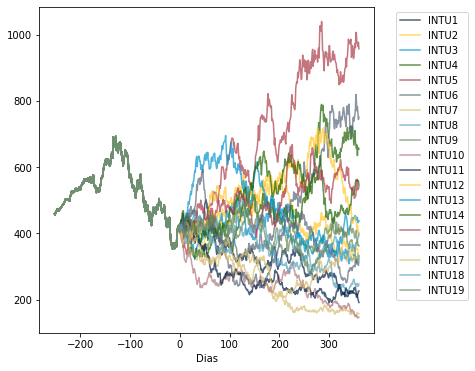

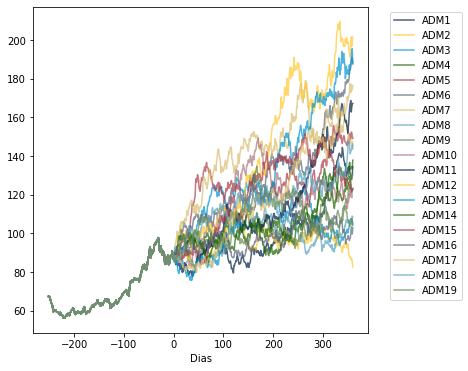

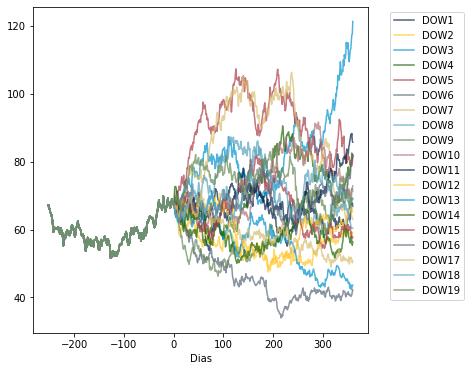

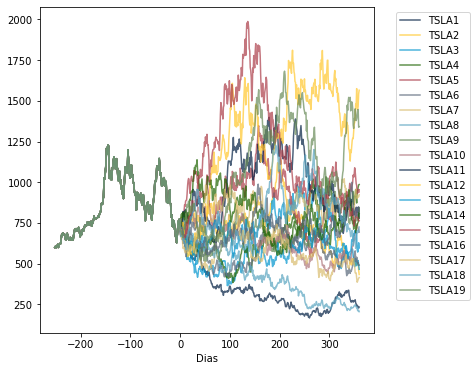

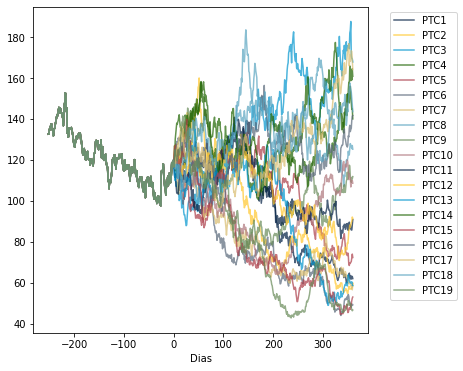

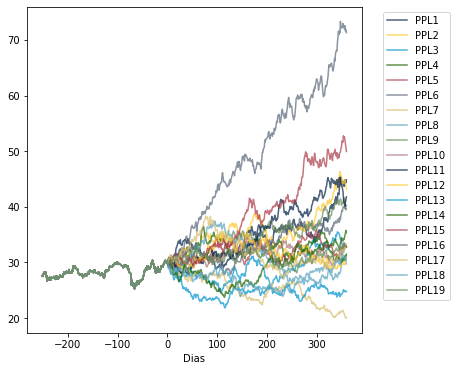

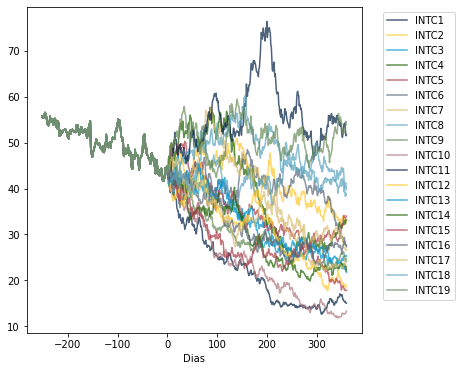

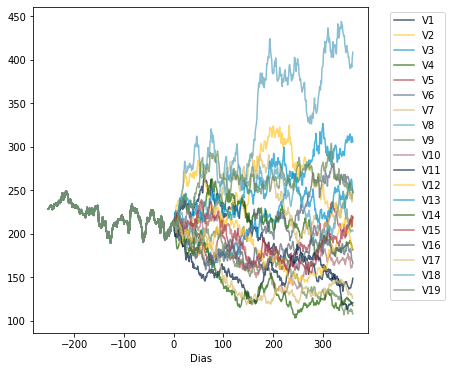

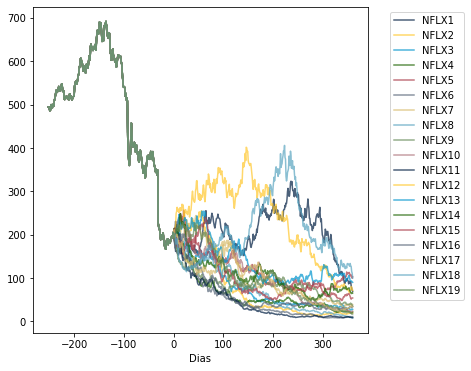

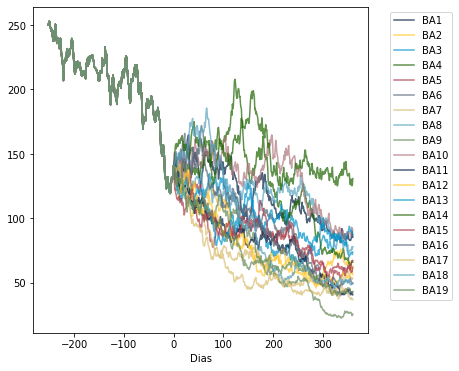

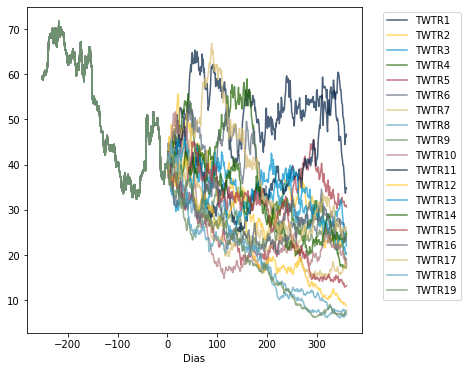

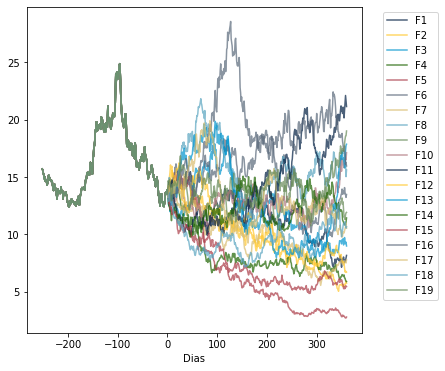

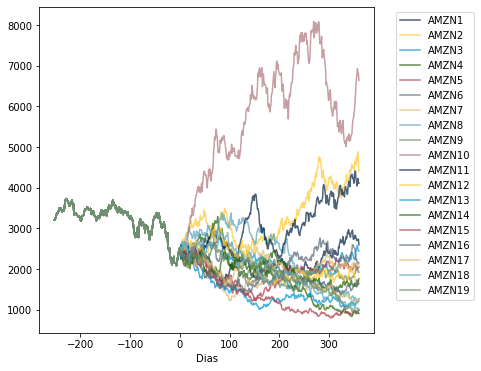

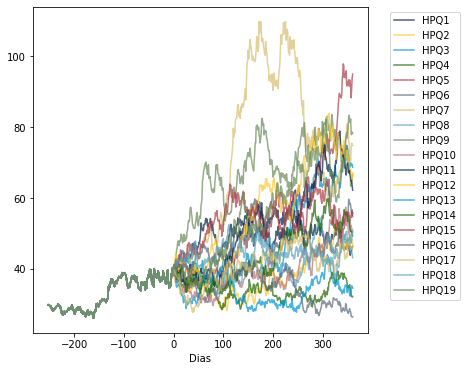

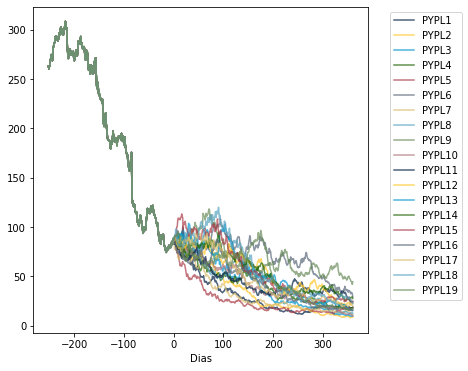

In [20]:
import os

def __main__():
    stocks = trends_symbols
    months = int(input("How many months are you interested in keeping your stock for? "))
    days = months * 30
    present = datetime.today() - timedelta(days=1)
    past = present - timedelta(days=365)
    present = present.strftime('%Y-%m-%d')
    past = past.strftime('%Y-%m-%d')
    
    stockMean = []
    startingPrice = []
    returnPercentage = []

    for stock in stocks:
        currentMean,pInicial = analyzeStock(stock, past, present, days, 20)
        stockMean.append(currentMean)
        returnPercentage.append((currentMean/pInicial*100)-100)
        startingPrice.append(pInicial)
    os.system("cls")
    
    resultados=Table().with_columns("Accion",stocks,"Precio Inicial", startingPrice,"Precio Final (AVG)",stockMean,"Tasa de retorno (%)",returnPercentage)
    resultados=resultados.sort("Tasa de retorno (%)",descending=True)
    resultados.show()
    fila=resultados.row(0)
    print("\n")
    print(f"The best stock to invest for {str(months)} months is {fila.item(0)} with a return rate of {fila.item(3):.2f}%")
    print("\n")
__main__()